# RL Bandit Notebook

In [1]:
# Notebook for RL Work
# Written By Bryan

# ==== Bandit Imports ====
from Bandits import *    # Custom bandit classes

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import log_loss
from scipy.optimize import minimize



# ==== Mermaid display imports ====
import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    display(Image(url="https://mermaid.ink/img/" + base64_string))

## eGreedy 

#### Trial Configurations

Testbed Means: [0.9969674011144702, 0.7222306472464517, -1.1756613926955441, 1.1091518265628109, -1.4144019540475916, 0.37252222871533275, -0.7663567196486626, -0.9755876803734477, -0.631874954684058, -0.9302992222028544]


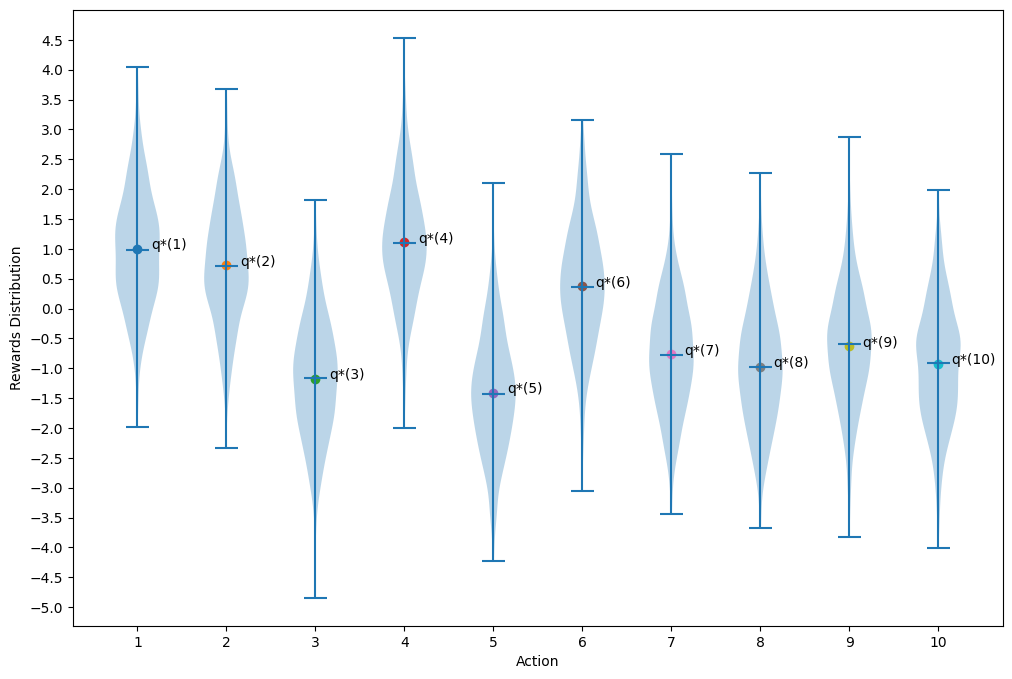

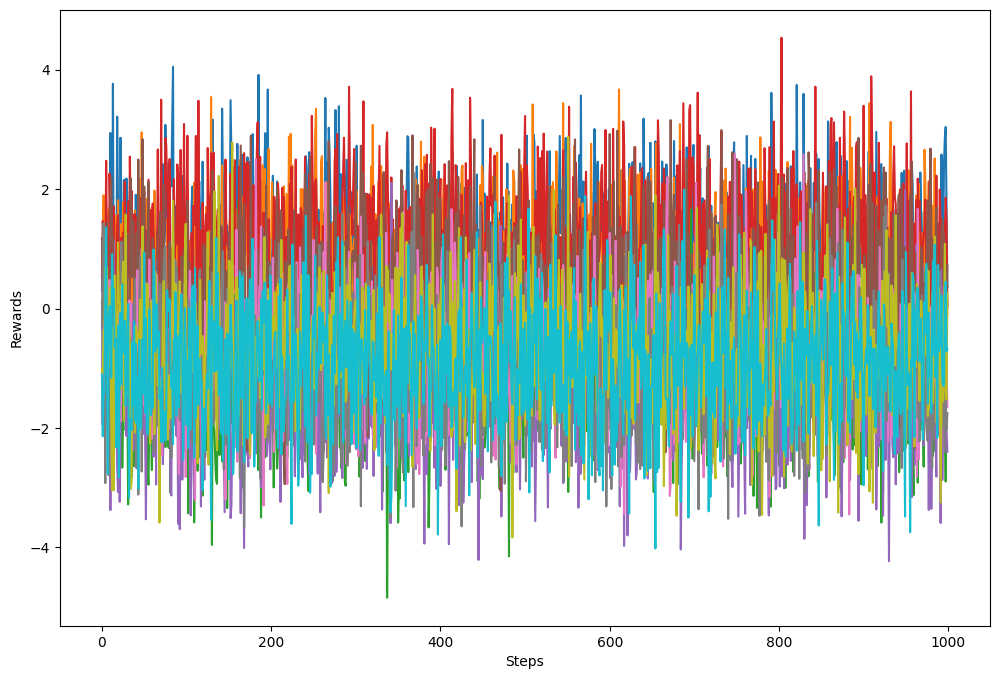

In [2]:
# Create and Show env
env = Testbed(num_problems=1000)

#Trial Params
k = env.k
steps = 300
trial_params = [k, steps]
reward_values = env.q_star

env.show_mean()
env.show_testbed()      # NOTE: Displays what the reward distribution could look like
env.show_test_walk()

In [3]:
#Model Params
start_val = 1


# Create eGreedy task
eg_01 = create_bandit_task(model_type="EG", model_params=[0,0.1], trial_params=trial_params, reward_values=reward_values, start_val=start_val)

tasks = [eg_01]
for task in tasks:
    task.simulate()


100%|██████████| 1000/1000 [00:01<00:00, 531.30it/s]


## Softmax

In [4]:
#Model Params
model_type = "SM"
alpha = 0.6
temp = 10                       # inverse temp
model_params = [alpha, temp]
start_val = 1



SM = create_bandit_task(model_type, model_params, trial_params, reward_values, start_val)
SM.simulate()

100%|██████████| 1000/1000 [00:01<00:00, 559.32it/s]


## Softmax_UCB

In [5]:
# Model Params
model_type = "SMUCB"
alpha = 0.1
temp = 5
uncertParam = .2
#uncert = 2
model_params = [alpha, temp, uncertParam]
start_val = 1

SMUCB = create_bandit_task(model_type=model_type, model_params=model_params, trial_params=trial_params, reward_values=reward_values, start_val=start_val)

SMUCB.simulate()

100%|██████████| 1000/1000 [00:11<00:00, 90.15it/s]


### Simulate Performance

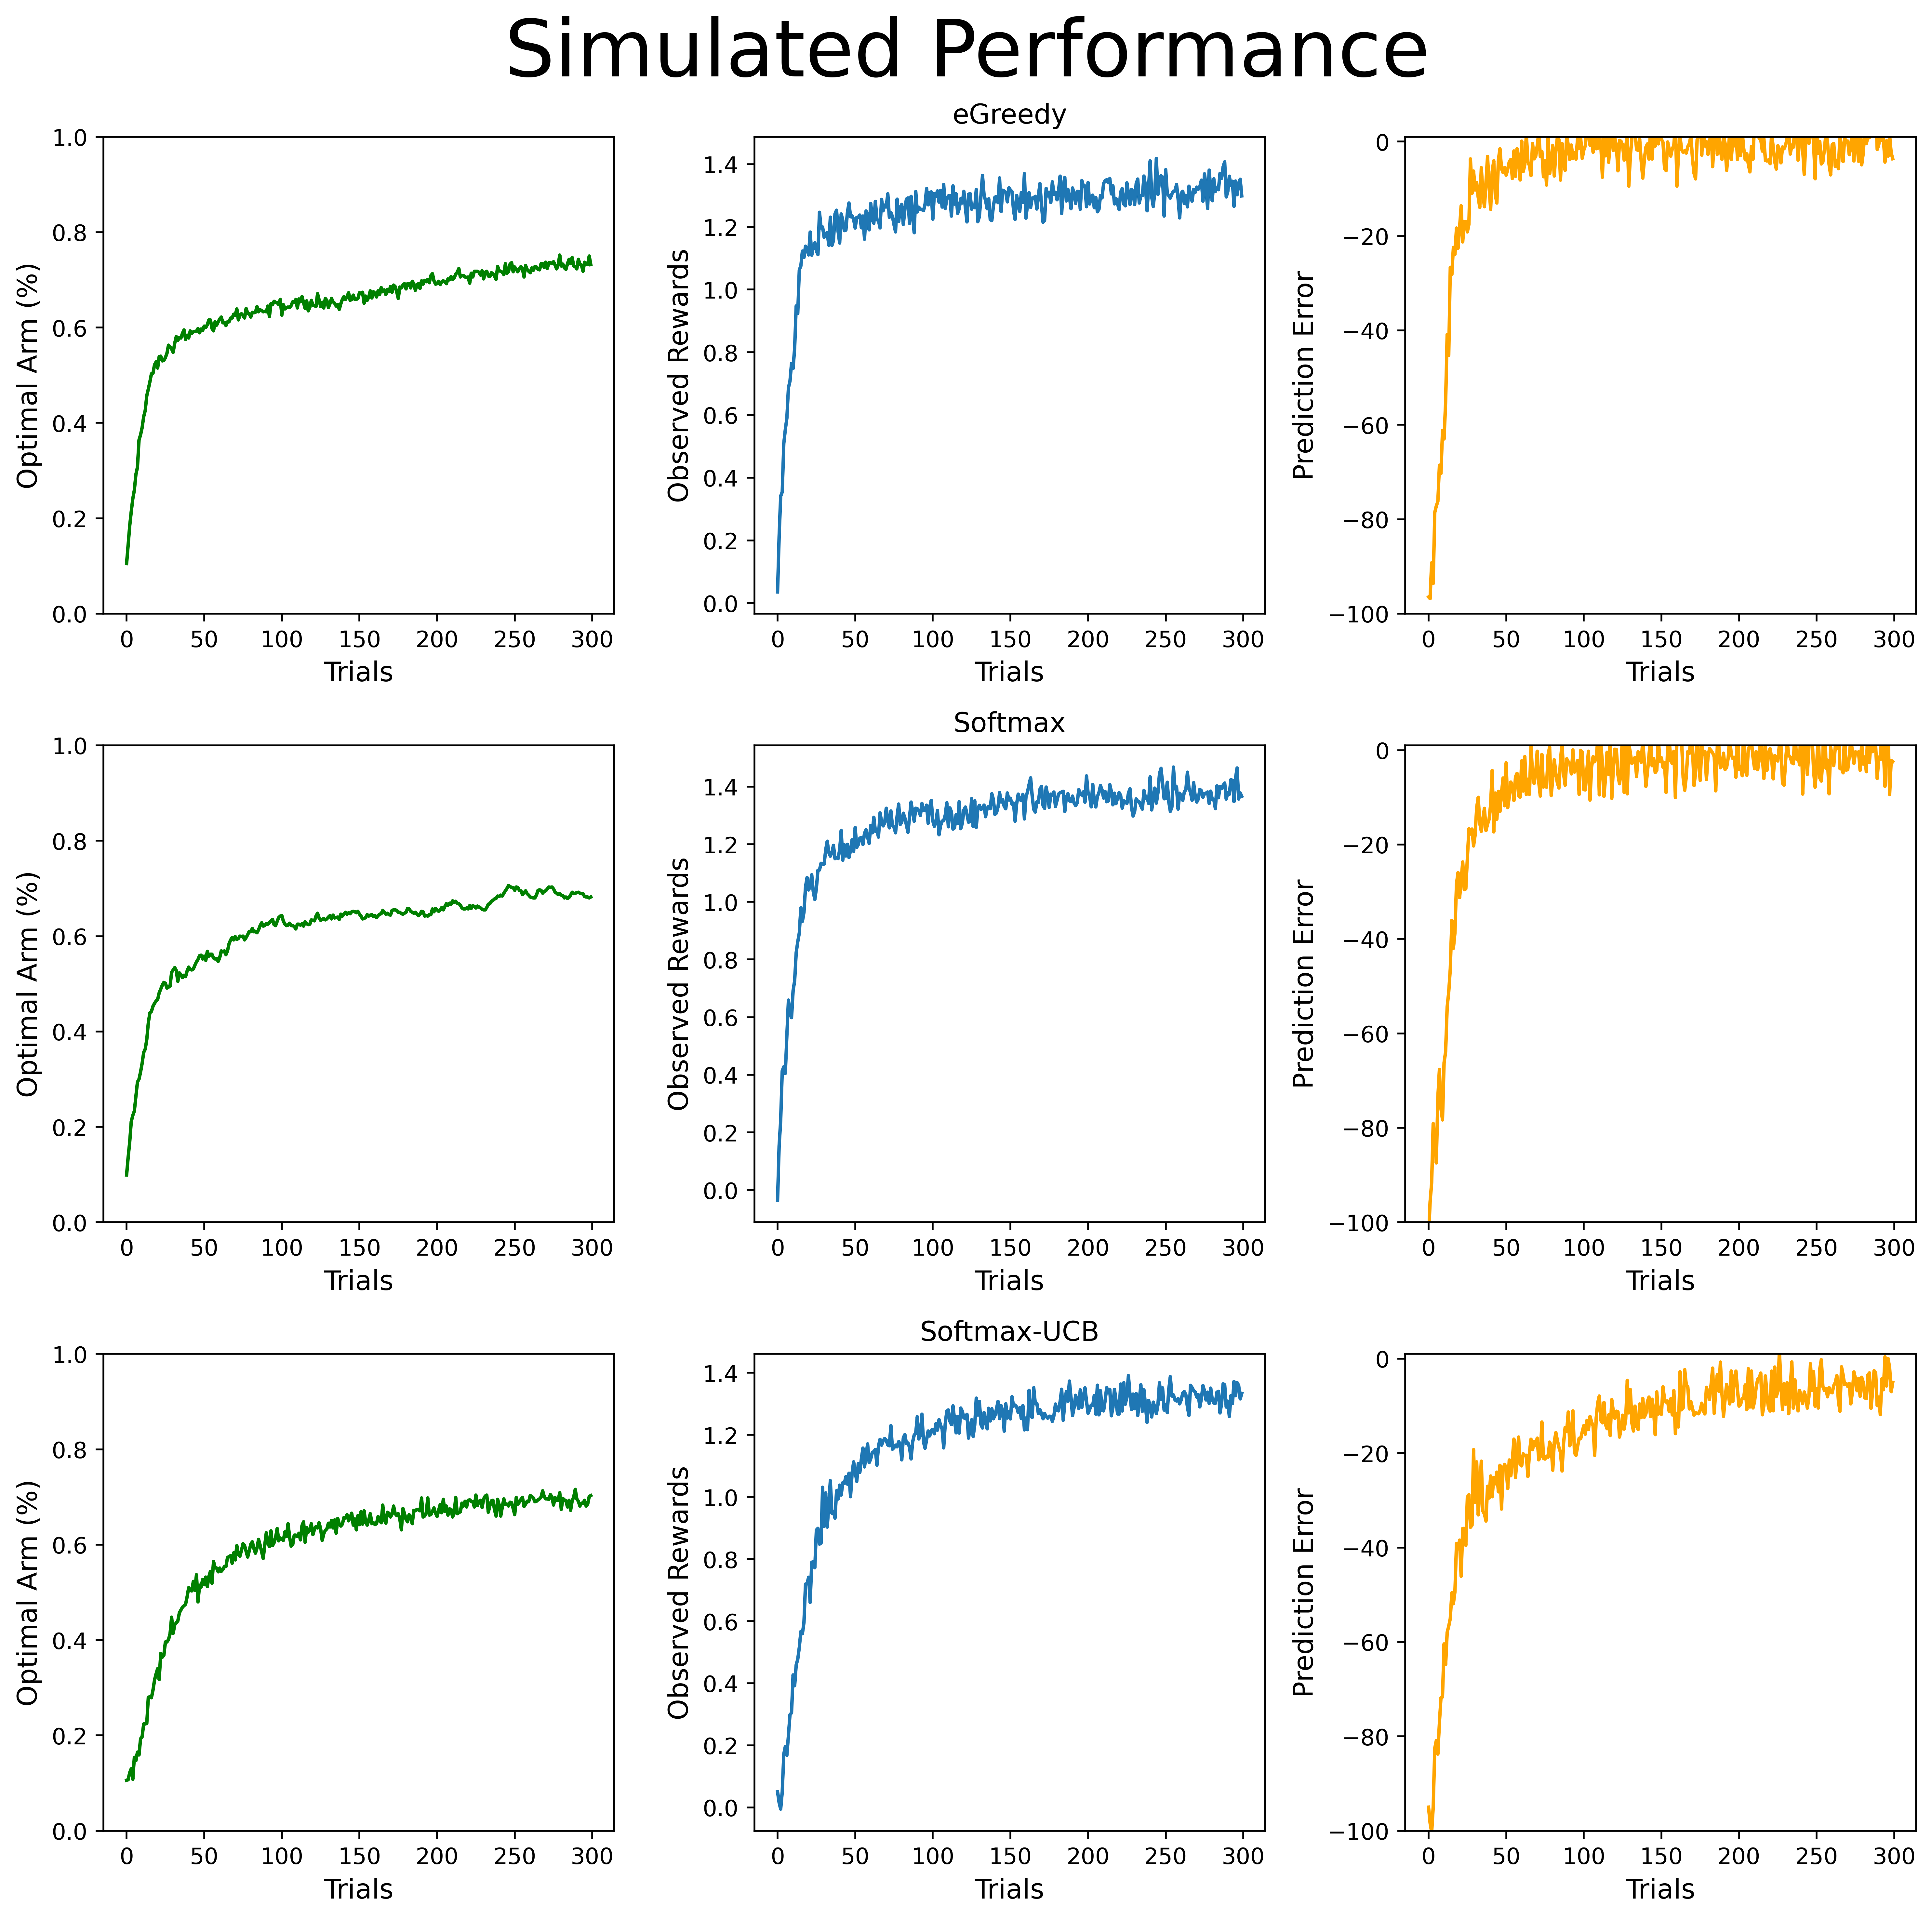

In [6]:
model_performance_summary(bandits=[eg_01, SM, SMUCB])
# print(f"Param Name:{key}\n {value}" for key, value in vars(eg_01))

## Log-Likelihood

In [9]:
eg_01.simulate_LL()
SM.simulate_LL()
SMUCB.simulate_LL()

# print(eg_01.total_LL_array)
# print(SM.total_LL_array)
# print(SMUCB.total_LL_array)


100%|██████████| 1000/1000 [00:08<00:00, 124.31it/s]


## Model Validation

#### Param Recovery
Fit data to model it was simulated with
<ol>
<li>Simulate choices and rewards using chosen parameter values(acts as ground truth)</li>
<li>
Run fitting procedure (neg log likelihood function) on simulated choice AND reward data.
See if we an estimate simulated parameter values (estimates are fitted parameter values)
</li>
</ol>

In [8]:
# Run this to display mermaid flowchart of parameter recovery
mm("""
flowchart LR
   subgraph input-parameters
   direction TB
   id1([epsilon])
   id2([alpha])
   id3([etc...])
   id1 ~~~ id2 ~~~ id3
   end

   subgraph output-parameters
   direction TB
   id4([epsilon])
   id5([alpha])
   id6([etc...])
   id4 ~~~ id5 ~~~ id6
   end

   simData[(Simulated Data)]
   model((RL Model))
   n([noise])
   fm{{fit data to model}}

   input-parameters --"(1) input"--> model
   model --"(1) creates"--> simData
   simData -."(2) (optional) Add".-> n
   simData --> fm
   n -.-> fm
   fm ~~~ output-parameters
   fm --"(3) Outputs"--> output-parameters
   input-parameters o-- "(4) compare"  --o output-parameters

""")

#### Model Recovery

Fit data to all models
<ol>
<li>
Use simulated choice and reward data from paramater recovery step
</li>

<li>
Calculate negative log likelihood values using each model on the simulated data
</li>
</ol>
